# Part 1- Importing And Reading Our Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Part 2-Doing a Quick Data Check

### Quickly confirming all the dataypes and non-null values in our dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**By confirming on entries (7032) present and the non-null count (7032) we come to a conclusion that there are no null values present in the dataframe**

**We also get the idea of all the datatypes present in our dataframe**

In [6]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

**df.describe() gives us a quick statistical summary of all the numerical data available in our dataframe**

# Part 3- Exploratory Data Analysis

   ## Doing a General feature Exploration

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**df.isna().null() tells us about any null values that we have in our dataset**

### 1) We will First start with a visualization of the count of people of have (churn) with a count plot. This gives us a headups count of the no.of churns

<Figure size 2000x1400 with 0 Axes>

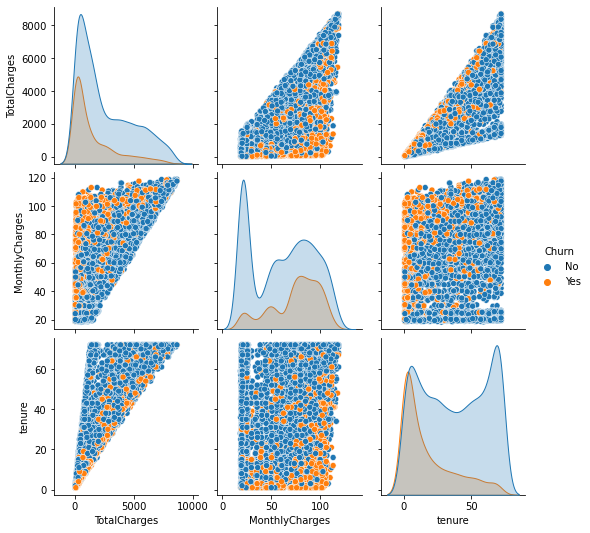

In [8]:
plt.figure(figsize=(10,7),dpi=200)
sns.pairplot(df,vars=['TotalCharges','MonthlyCharges','tenure'],hue='Churn')

**As we can can see there is a big amount of overlap between all the variables so it might be a bit tough for machine learning alogorithms to predict the corrct output**

In [9]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

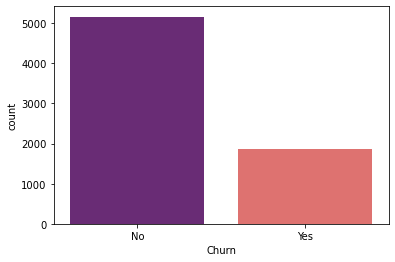

In [10]:
sns.countplot(data=df,x='Churn',palette='magma')

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

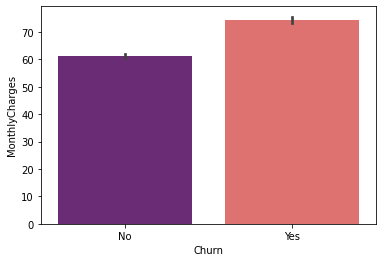

In [11]:
sns.barplot(data=df,y='MonthlyCharges',x='Churn',palette='magma')

### 2) Now we will explore our distribution of totalcharges between Churn Categories with  Violen Plot/Box Plot.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

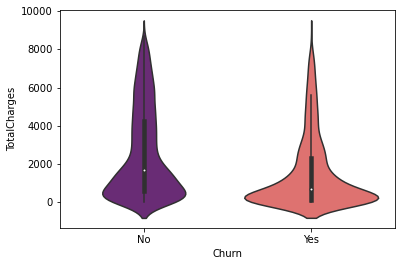

In [12]:
sns.violinplot(data=df,x='Churn',y='TotalCharges',palette='magma')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

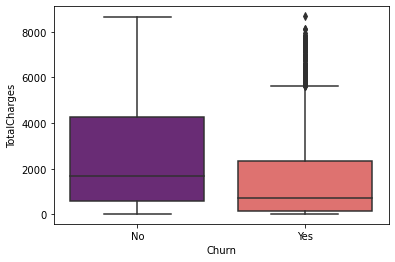

In [13]:
sns.boxplot(data=df,x='Churn',y='TotalCharges',palette='magma')

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

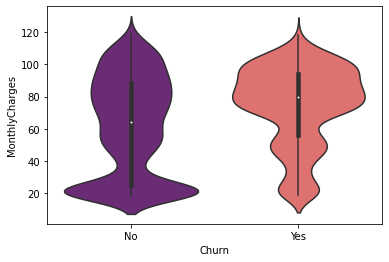

In [14]:
sns.violinplot(data=df,x='Churn',y='MonthlyCharges',palette='magma')

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

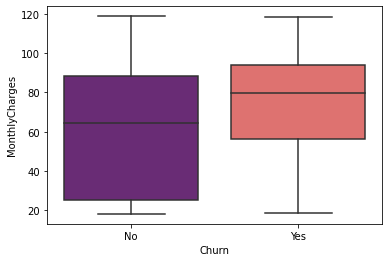

In [15]:
sns.boxplot(data=df,x='Churn',y='MonthlyCharges',palette='magma')

### 3) Now we create  a boxplt showing the distribution of TotalCharges per Contracttype and add a hue coloring based on the Churn

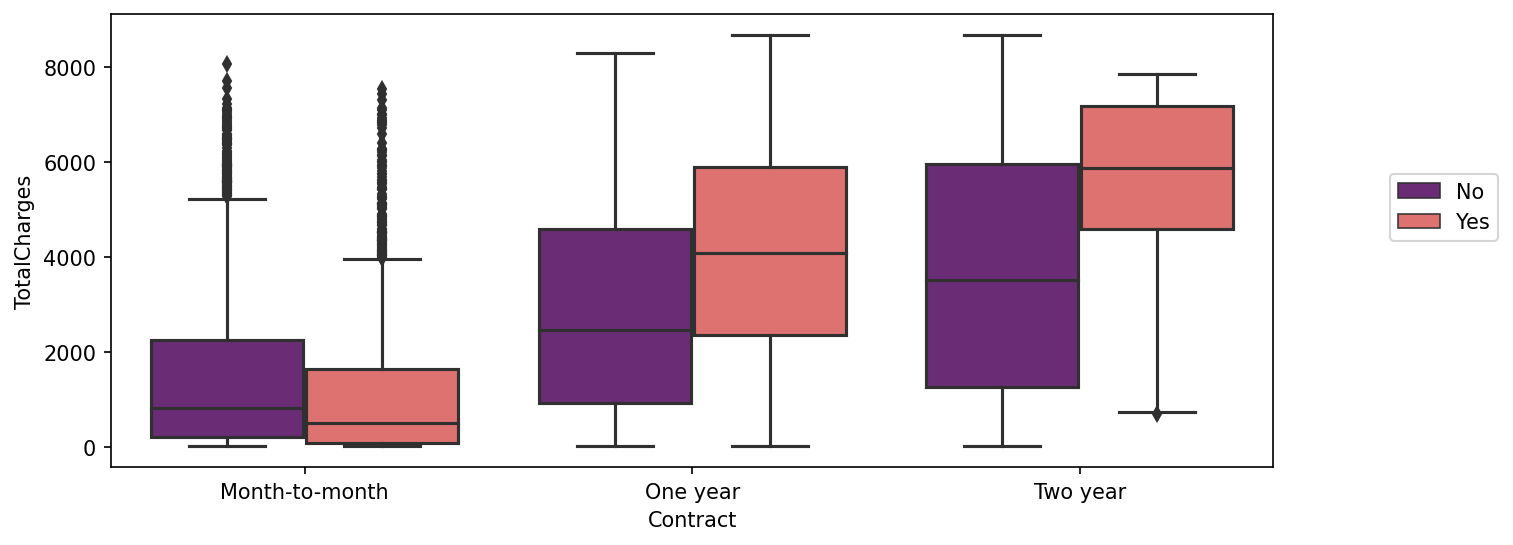

In [16]:
plt.figure(figsize=(10,4),dpi=150)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn',palette='magma')
plt.legend(loc=(1.1,0.5))

**We can see that Month-Month service is a harder problem to fix because they are likely to churn as the period is less and the boxplot gives us a clear picture about it. People who have a One year/ Two year have a greater difference of churn between them which can be clearly seen in the diagram. So this gives us an idea that people with a greater total Charge are more likely to churn over a longer period of time** 

### 4)  Create a bar plot showing the correlation of the following features to the class label. For the categorical features, we will need to convert them into dummy variables first, as we can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']



In [17]:
pd.get_dummies(df[['Churn','gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']])

SeniorCitizen  Churn_No  Churn_Yes  gender_Female  gender_Male  \
0                 0         1          0              1            0   
1                 0         1          0              0            1   
2                 0         0          1              0            1   
3                 0         1          0              0            1   
4                 0         0          1              1            0   
...             ...       ...        ...            ...          ...   
7027              0         1          0              0            1   
7028              0         1          0              1            0   
7029              0         1          0              1            0   
7030              1         0          1              0            1   
7031              0         1          0              0            1   

      Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
0              0            1              1               0                1   
1              1            0              1               0                0   
2              1            0              1               0                0   
3              1            0              1               0                1   
4              1            0              1               0                0   
...          ...          ...            ...             ...              ...   
7027           0            1              0               1                0   
7028           0            1              0               1                0   
7029           0            1              0               1                1   
7030           0            1              1               0                0   
7031           1            0              1               0                0   

      ...  StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0     ...                    0                        1                  0   
1     ...                    0                        0                  1   
2     ...                    0                        1                  0   
3     ...                    0                        0                  1   
4     ...                    0                        1                  0   
...   ...                  ...                      ...                ...   
7027  ...                    1                        0                  1   
7028  ...                    1                        0                  1   
7029  ...                    0                        1                  0   
7030  ...                    0                        1                  0   
7031  ...                    1                        0                  0   

      Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                     0                    0                     1   
1                     0                    1                     0   
2                     0                    0                     1   
3                     0                    1                     0   
4                     0                    0                     1   
...                 ...                  ...                   ...   
7027                  0                    0                     1   
7028                  0                    0                     1   
7029                  0                    0                     1   
7030                  0                    0                     1   
7031                  1                    0                     1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7027                                        0  

In [18]:
pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

SeniorCitizen  gender_Female  \
SeniorCitizen                                 1.000000       0.001819   
gender_Female                                 0.001819       1.000000   
gender_Male                                  -0.001819      -1.000000   
Partner_No                                   -0.016957      -0.001379   
Partner_Yes                                   0.016957       0.001379   
Dependents_No                                 0.210550       0.010349   
Dependents_Yes                               -0.210550      -0.010349   
PhoneService_No                              -0.008392      -0.007515   
PhoneService_Yes                              0.008392       0.007515   
MultipleLines_No                             -0.136377      -0.004335   
MultipleLines_No phone service               -0.008392      -0.007515   
MultipleLines_Yes                             0.142996       0.008883   
OnlineSecurity_No                             0.185145      -0.010859   
OnlineSecurity_No internet service           -0.182519      -0.004745   
OnlineSecurity_Yes                           -0.038576       0.016328   
OnlineBackup_No                               0.087539      -0.008605   
OnlineBackup_No internet service             -0.182519      -0.004745   
OnlineBackup_Yes                              0.066663       0.013093   
DeviceProtection_No                           0.094403       0.003163   
DeviceProtection_No internet service         -0.182519      -0.004745   
DeviceProtection_Yes                          0.059514       0.000807   
TechSupport_No                                0.205254      -0.003815   
TechSupport_No internet service              -0.182519      -0.004745   
TechSupport_Yes                              -0.060577       0.008507   
InternetService_DSL                          -0.108276      -0.007584   
InternetService_Fiber optic                   0.254923       0.011189   
InternetService_No                           -0.182519      -0.004745   
StreamingTV_No                                0.048664      -0.003088   
StreamingTV_No internet service              -0.182519      -0.004745   
StreamingTV_Yes                               0.105445       0.007124   
StreamingMovies_No                            0.034196      -0.006078   
StreamingMovies_No internet service          -0.182519      -0.004745   
StreamingMovies_Yes                           0.119842       0.010105   
Contract_Month-to-month                       0.137752       0.003251   
Contract_One year                            -0.046491      -0.007755   
Contract_Two year                            -0.116205       0.003603   
PaperlessBilling_No                          -0.156258      -0.011902   
PaperlessBilling_Yes                          0.156258       0.011902   
PaymentMethod_Bank transfer (automatic)      -0.016235       0.015973   
PaymentMethod_Credit card (automatic)        -0.024359      -0.001632   
PaymentMethod_Electronic check                0.171322      -0.000844   
PaymentMethod_Mailed check                   -0.152987      -0.013199   
Churn_No                                     -0.150541      -0.008545   
Churn_Yes                                     0.150541       0.008545   

                                         gender_Male  Partner_No  Partner_Yes  \
SeniorCitizen                              -0.001819   -0.016957     0.016957   
gender_Female                              -1.000000   -0.001379     0.001379   
gender_Male                                 1.000000    0.001379    -0.001379   
Partner_No                                  0.001379    1.000000    -1.000000   
Partner_Yes                                -0.001379   -1.000000     1.000000   
Dependents_No                              -0.010349    0.452269    -0.452269   
Dependents_Yes                              0.010349   -0.452269     0.452269   
PhoneService_No                             0.007515    0.018397    -0.018397   
PhoneService_Yes          

In [19]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

In [20]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

In [21]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

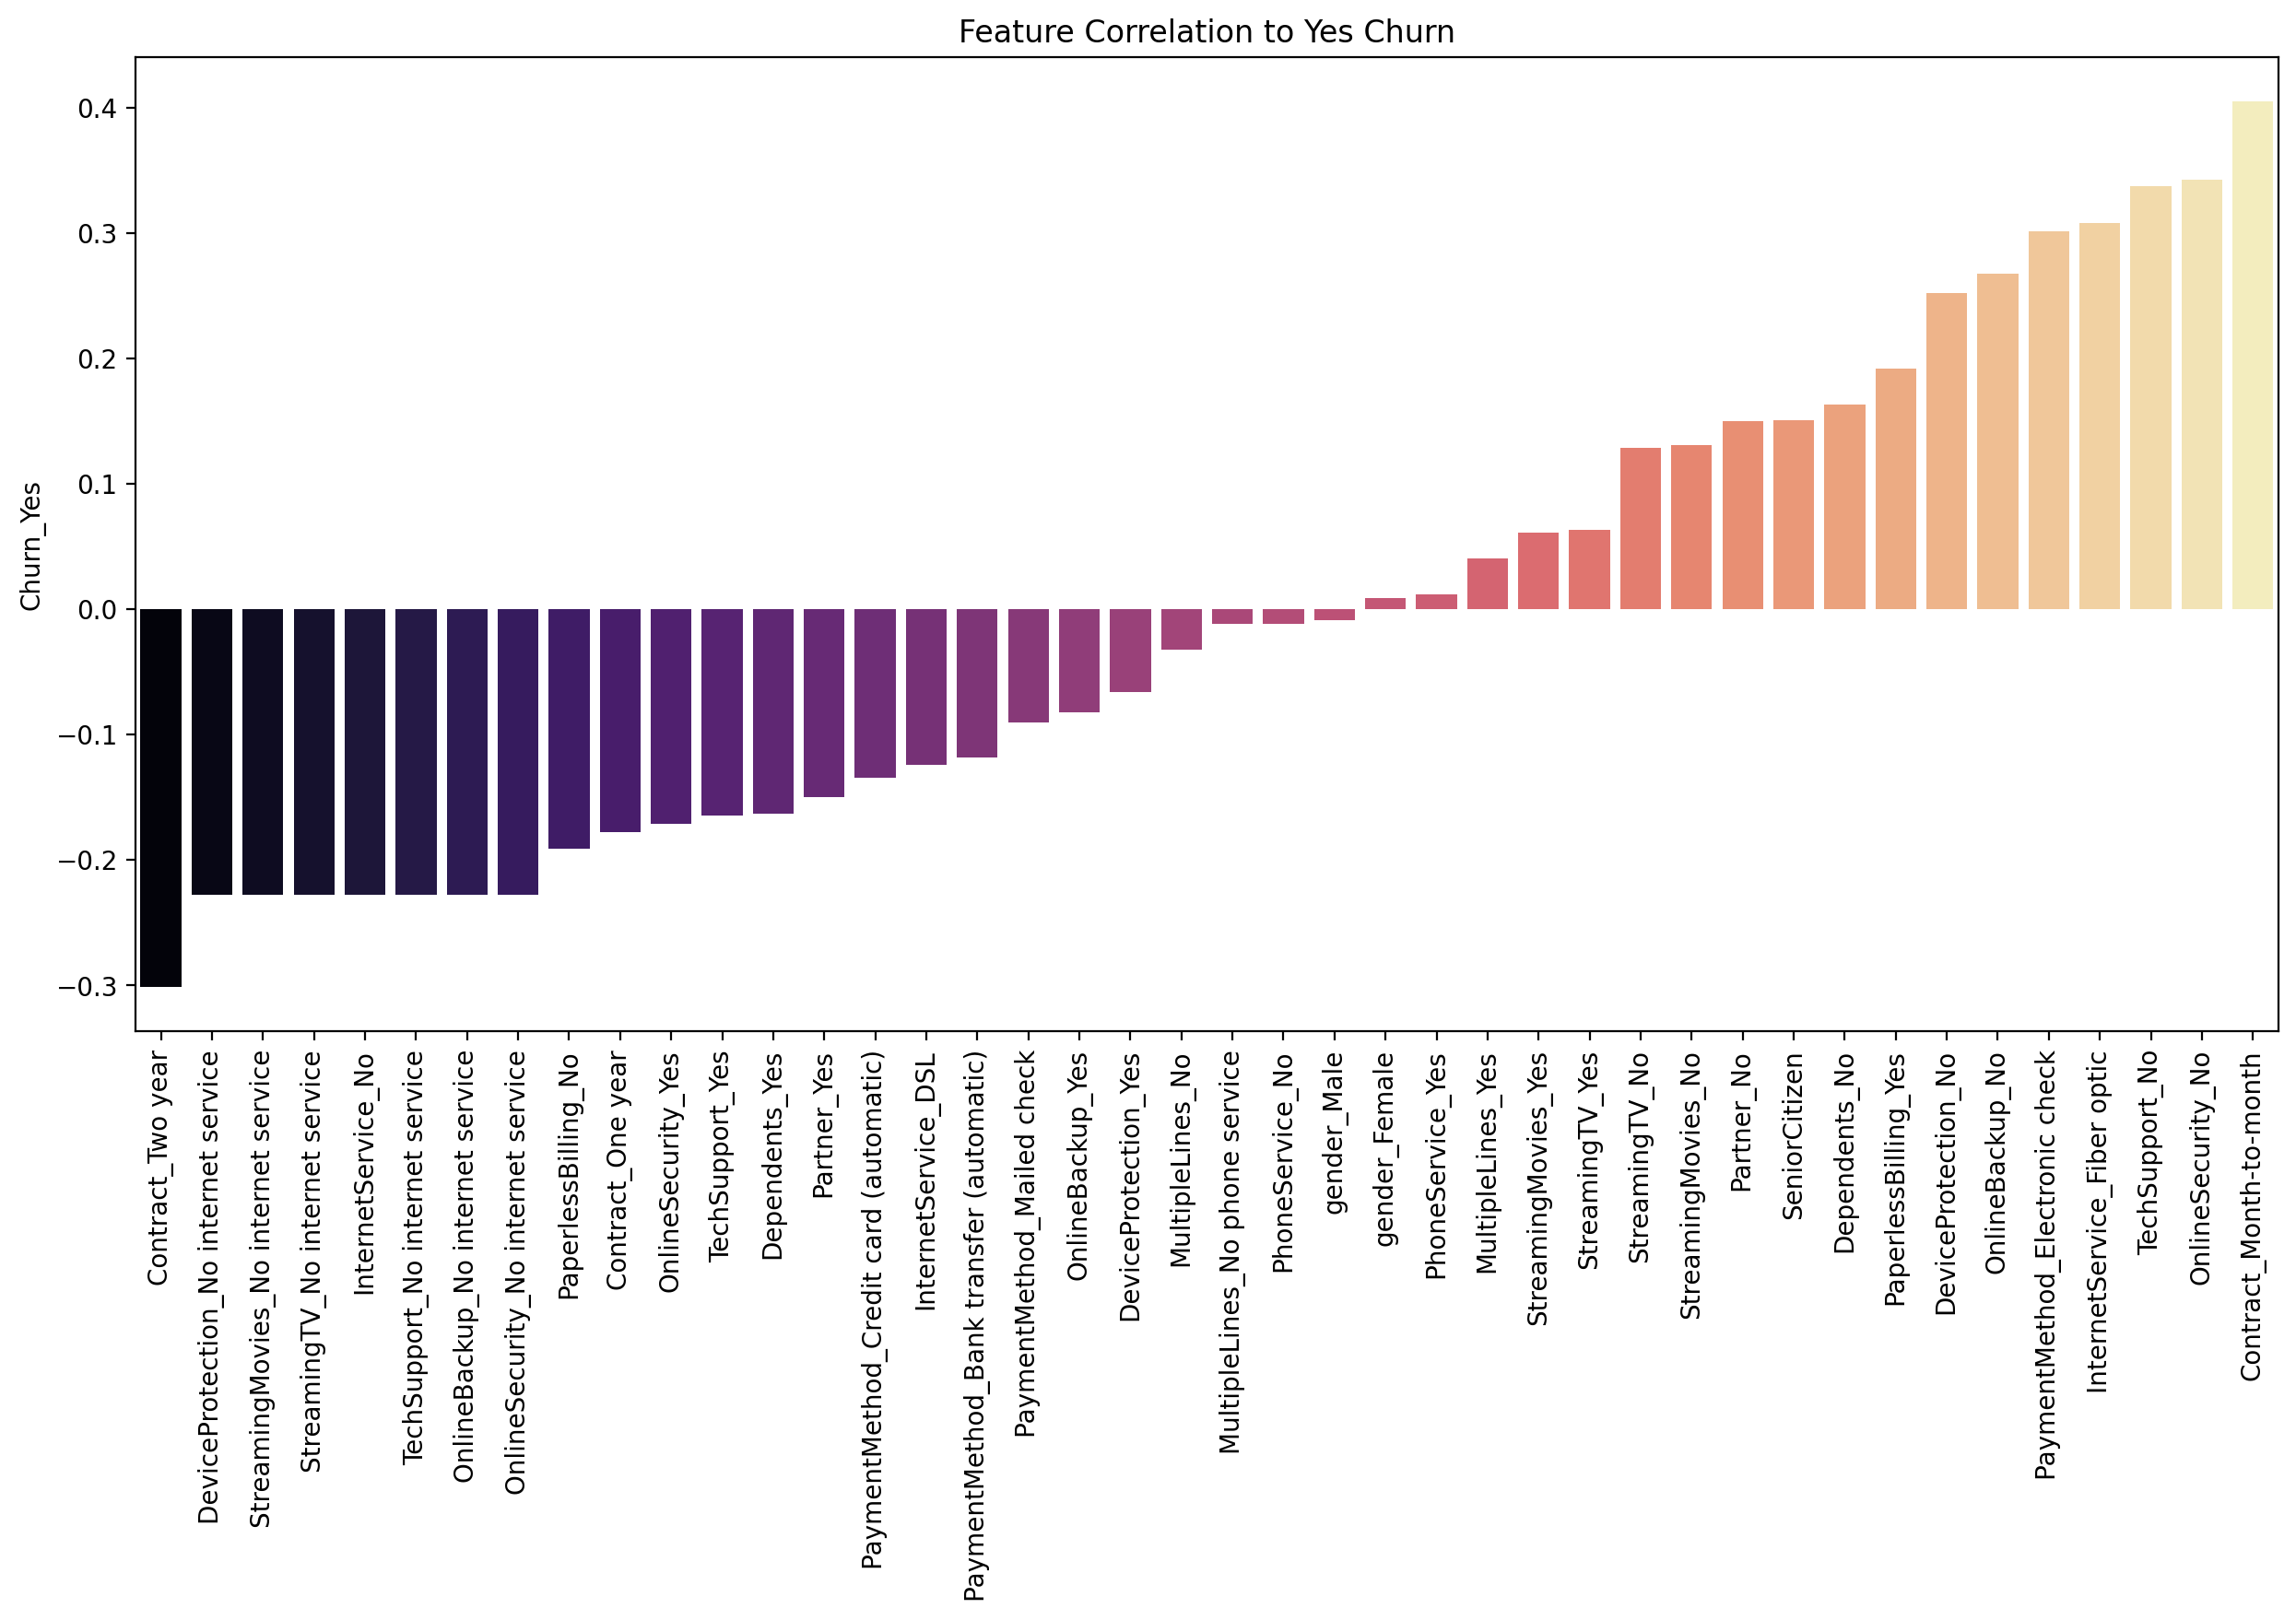

In [22]:
plt.figure(figsize=(15,7),dpi=200)
plt.title('Feature Correlation to Yes Churn')
sns.barplot(x=corr_yes_churn.index,y=corr_yes_churn,palette='magma')
plt.xticks(rotation=90);

In [23]:
corr_no_churn = corr_df['Churn_No'].sort_values().iloc[1:-1]

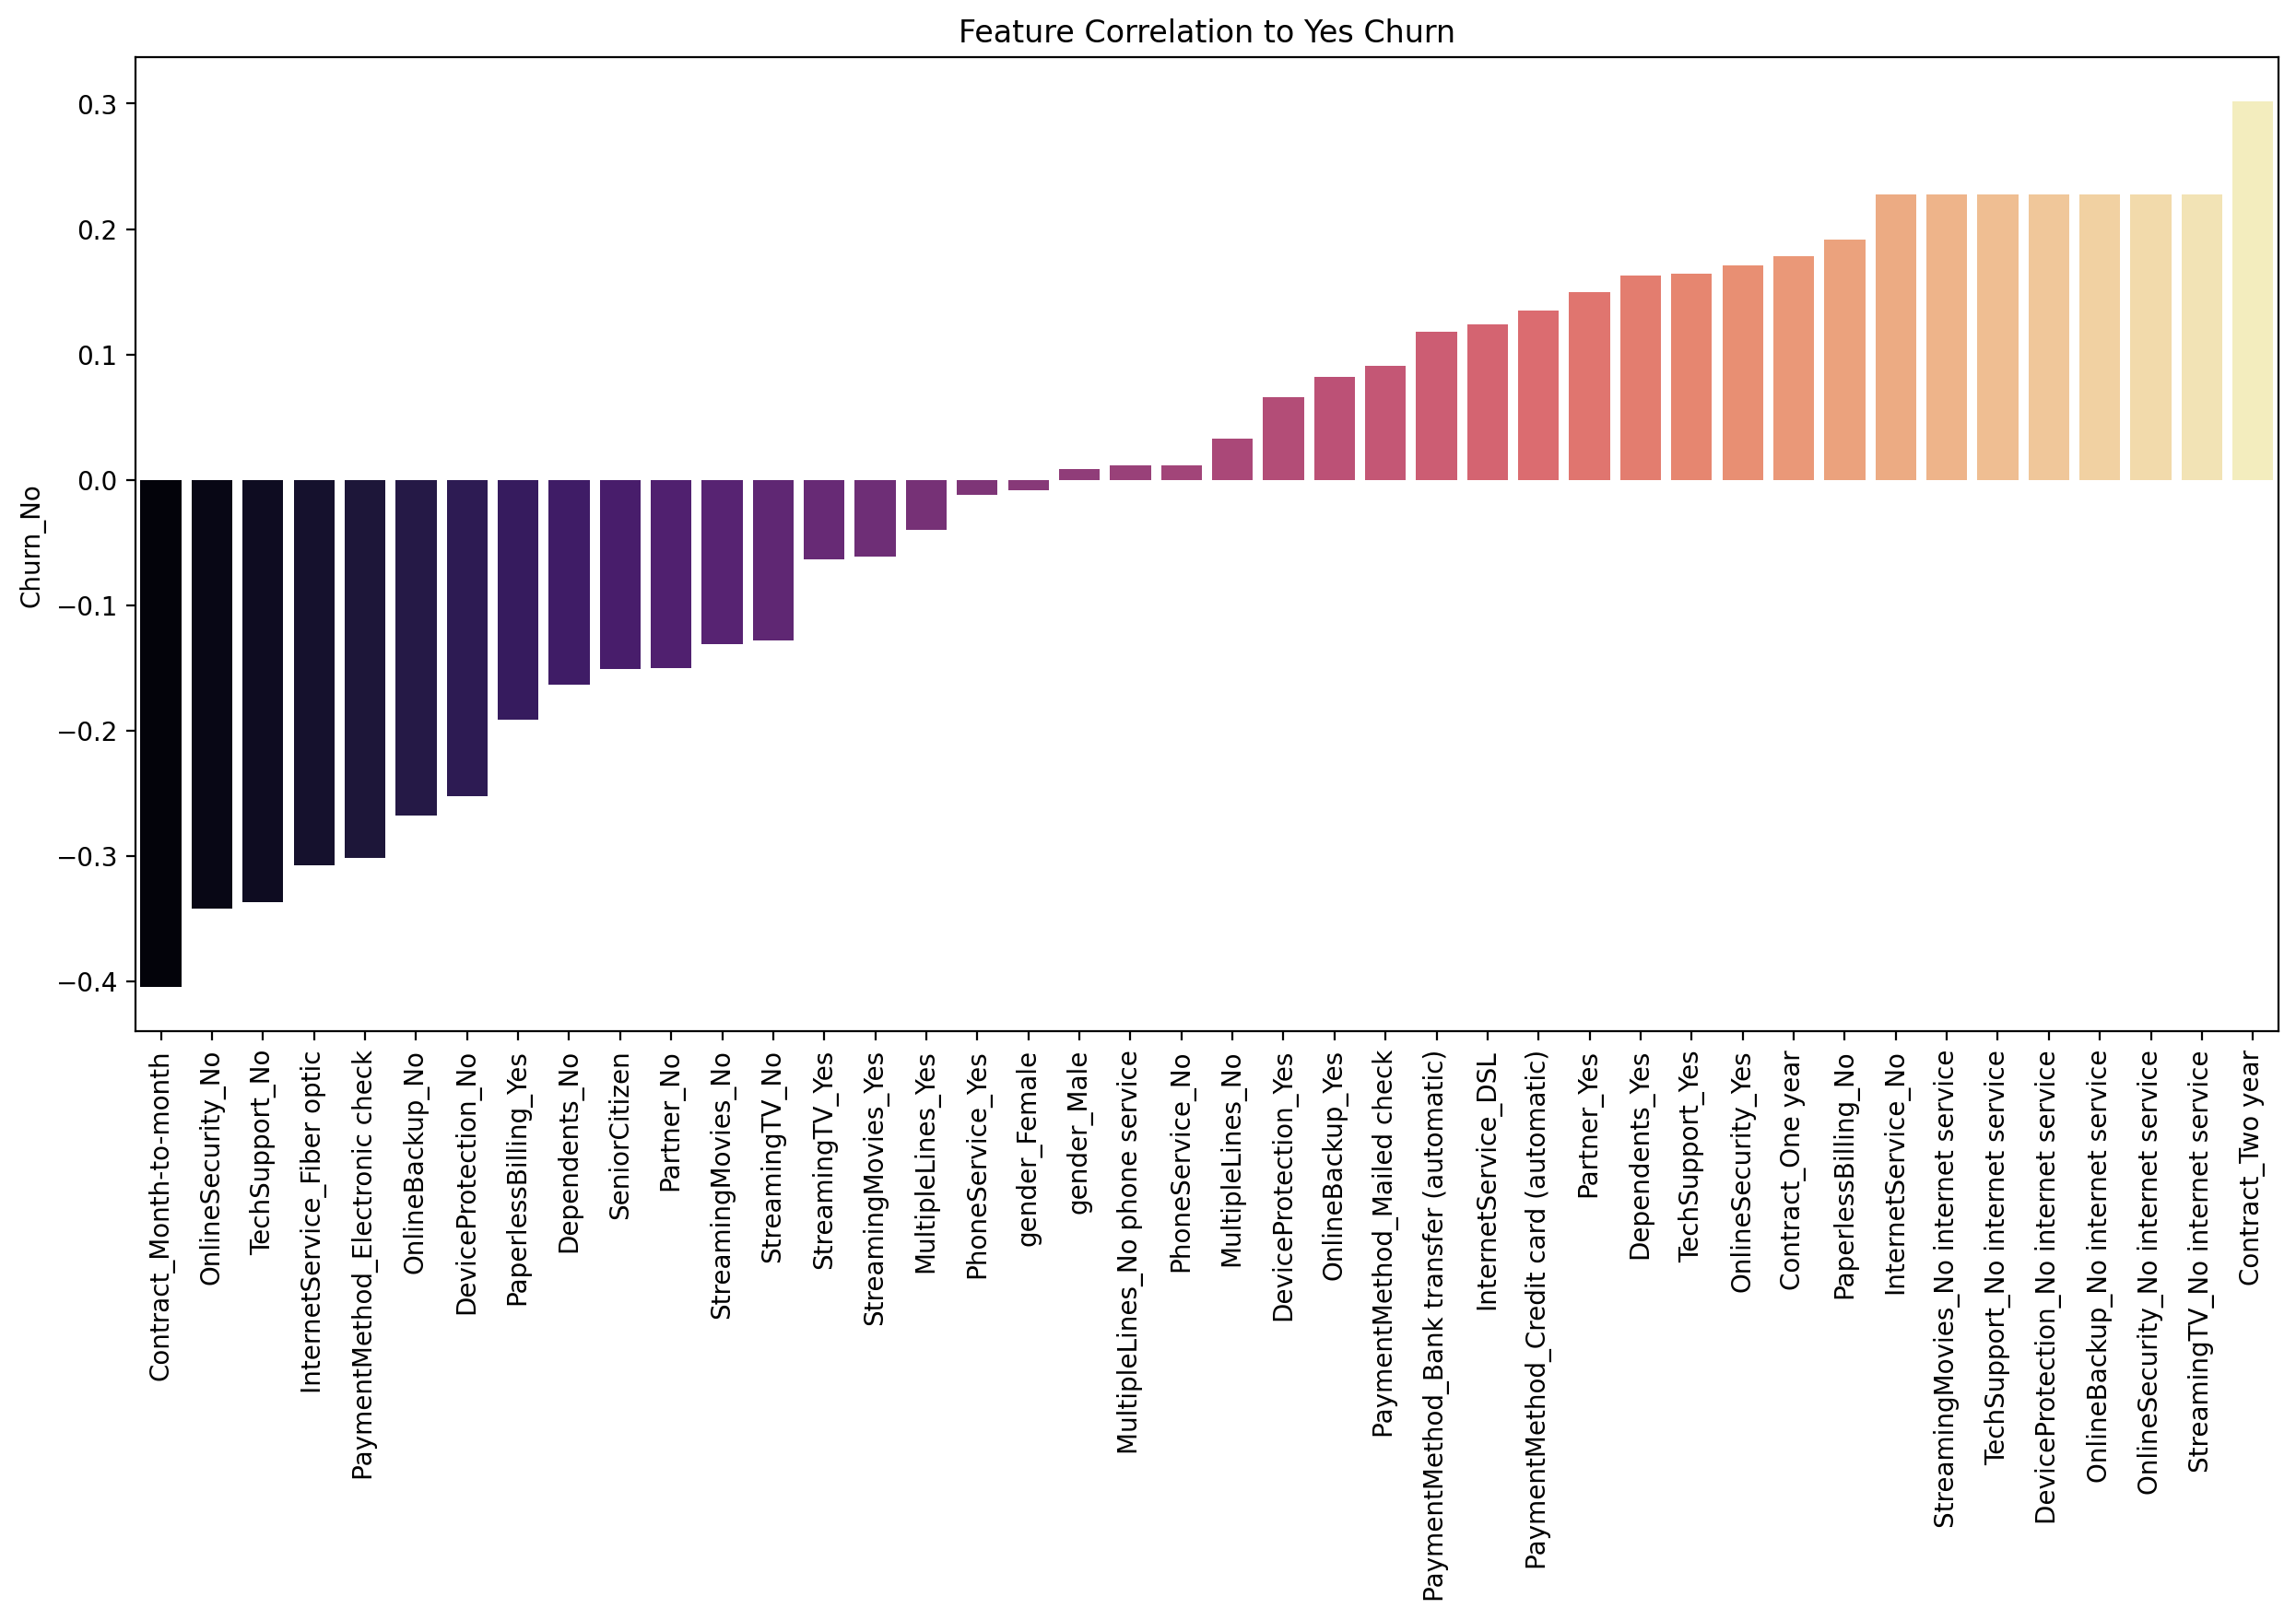

In [24]:
plt.figure(figsize=(15,7),dpi=200)
plt.title('Feature Correlation to Yes Churn')
sns.barplot(x=corr_no_churn.index,y=corr_no_churn,palette='magma')
plt.xticks(rotation=90);

# Part 4- Cohorts and Churn Analysis

**Cohort analysis is performed here becuse people in this dataset can be divided on the bases of their tenure and hence we can study and take a deeper dive as to how different people of cohorts churn**

### 5) What are the 3 Contract type avaliable to us 

In [25]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

### 6) Creating a Histogram to understand how many people are there in tenure colunm

<AxesSubplot:xlabel='tenure', ylabel='Count'>

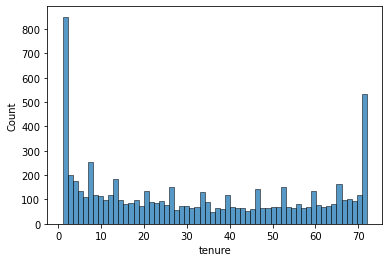

In [26]:
sns.histplot(data=df,x='tenure',bins=60)

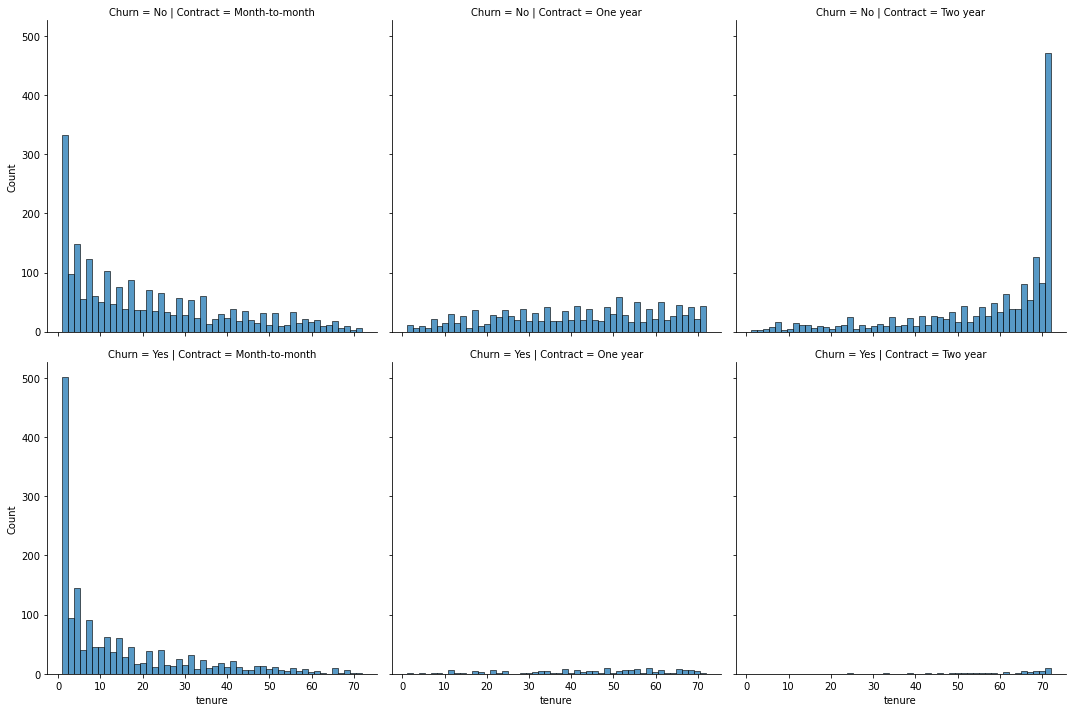

In [27]:
sns.displot(data=df,x='tenure',bins=50,col="Contract",row="Churn",palette='magma')

**This gives us a complete picture of people who Churning at which partivular contract i.e Most people churn during the first Month itself** 

### 7) Creating a Scatter plot of total charges vs Monthly Charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

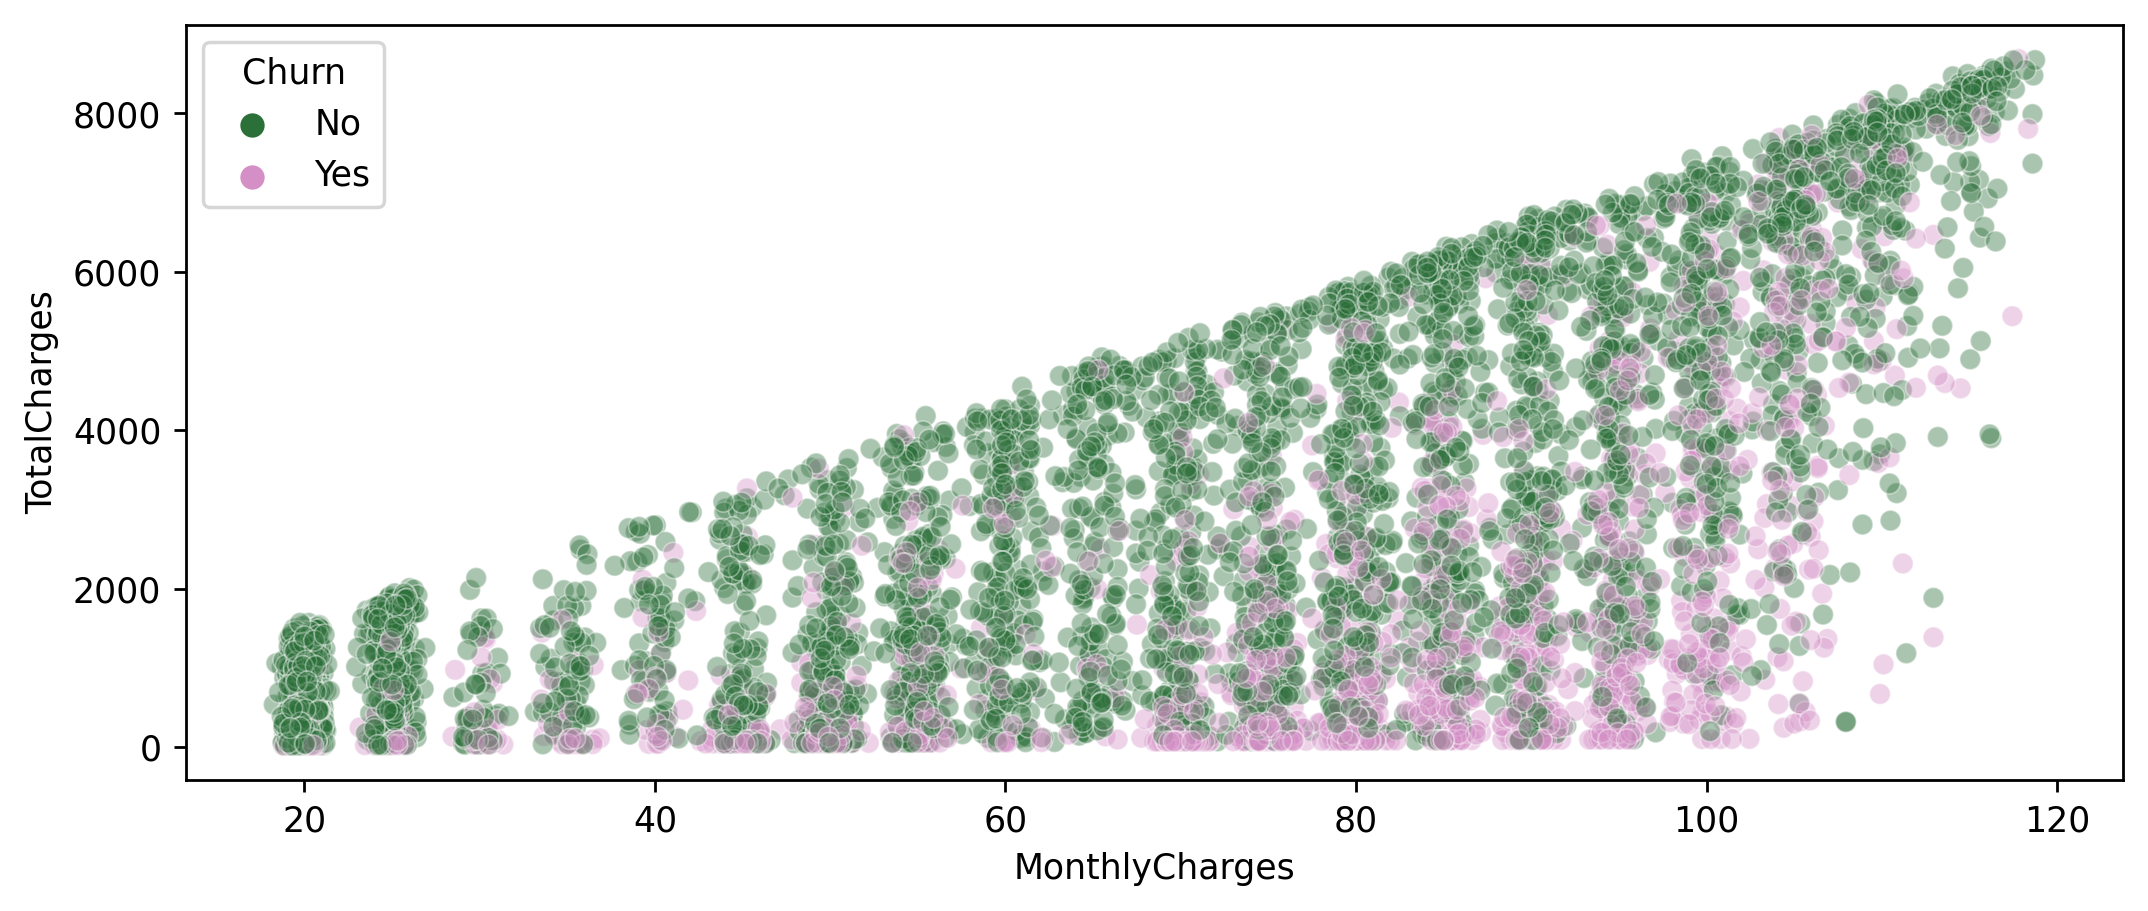

In [28]:
plt.figure(figsize=(10,4),dpi=250)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.4,palette='cubehelix')

### 8) Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**Treating each unique tenure group as a cohort we calculate the Churn rate (percentage that had Yes Churn) per cohort. We should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [29]:
df.groupby(['Churn','tenure']).count().transpose()['Yes']

tenure             1    2   3   4   5   6   7   8   9   10  ...  63  64  65  \
customerID        380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
gender            380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
SeniorCitizen     380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
Partner           380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
Dependents        380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
PhoneService      380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
MultipleLines     380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
InternetService   380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
OnlineSecurity    380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
OnlineBackup      380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
DeviceProtection  380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
TechSupport       380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
StreamingTV       380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
StreamingMovies   380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
Contract          380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
PaperlessBilling  380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
PaymentMethod     380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
MonthlyCharges    380  123  94  83  64  40  51  42  46  45  ...   4   4   9   
TotalCharges      380  123  94  83  64  40  51  42  46  45  ...   4   4   9   

tenure            66  67  68  69  70  71  72  
customerID        13  10   9   8  11   6   6  
gender            13  10   9   8  11   6   6  
SeniorCitizen     13  10   9   8  11   6   6  
Partner           13  10   9   8  11   6   6  
Dependents        13  10   9   8  11   6   6  
PhoneService      13  10   9   8  11   6   6  
MultipleLines     13  10   9   8  11   6   6  
InternetService   13  10   9   8  11   6   6  
OnlineSecurity    13  10   9   8  11   6   6  
OnlineBackup      13  10   9   8  11   6   6  
DeviceProtection  13  10   9   8  11   6   6  
TechSupport       13  10   9   8  11   6   6  
StreamingTV       13  10   9   8  11   6   6  
StreamingMovies   13  10   9   8  11   6   6  
Contract          13  10   9   8  11   6   6  
PaperlessBilling  13  10   9   8  11   6   6  
PaymentMethod     13  10   9   8  11   6   6  
MonthlyCharges    13  10   9   8  11   6   6  
TotalCharges      13  10   9   8  11   6   6  

[19 rows x 72 columns]

In [30]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [31]:
df.groupby(['Churn','tenure']).count().transpose()['No']

tenure             1    2    3   4   5   6   7   8   9   10  ...  63  64  65  \
customerID        233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
gender            233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
SeniorCitizen     233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
Partner           233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
Dependents        233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
PhoneService      233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
MultipleLines     233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
InternetService   233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
OnlineSecurity    233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
OnlineBackup      233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
DeviceProtection  233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
TechSupport       233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
StreamingTV       233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
StreamingMovies   233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
Contract          233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
PaperlessBilling  233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
PaymentMethod     233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
MonthlyCharges    233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
TotalCharges      233  115  106  93  69  70  80  81  73  71  ...  68  76  67   

tenure            66  67  68  69   70   71   72  
customerID        76  88  91  87  108  164  356  
gender            76  88  91  87  108  164  356  
SeniorCitizen     76  88  91  87  108  164  356  
Partner           76  88  91  87  108  164  356  
Dependents        76  88  91  87  108  164  356  
PhoneService      76  88  91  87  108  164  356  
MultipleLines     76  88  91  87  108  164  356  
InternetService   76  88  91  87  108  164  356  
OnlineSecurity    76  88  91  87  108  164  356  
OnlineBackup      76  88  91  87  108  164  356  
DeviceProtection  76  88  91  87  108  164  356  
TechSupport       76  88  91  87  108  164  356  
StreamingTV       76  88  91  87  108  164  356  
StreamingMovies   76  88  91  87  108  164  356  
Contract          76  88  91  87  108  164  356  
PaperlessBilling  76  88  91  87  108  164  356  
PaymentMethod     76  88  91  87  108  164  356  
MonthlyCharges    76  88  91  87  108  164  356  
TotalCharges      76  88  91  87  108  164  356  

[19 rows x 72 columns]

In [32]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [33]:
# tells us the percentage of people who churned 
churn_rate = 100*yes_churn/(no_churn+yes_churn)
churn_rate = churn_rate.transpose()
churn_rate

customerID     gender  SeniorCitizen    Partner  Dependents  \
tenure                                                                
1        61.990212  61.990212      61.990212  61.990212   61.990212   
2        51.680672  51.680672      51.680672  51.680672   51.680672   
3        47.000000  47.000000      47.000000  47.000000   47.000000   
4        47.159091  47.159091      47.159091  47.159091   47.159091   
5        48.120301  48.120301      48.120301  48.120301   48.120301   
...            ...        ...            ...        ...         ...   
68        9.000000   9.000000       9.000000   9.000000    9.000000   
69        8.421053   8.421053       8.421053   8.421053    8.421053   
70        9.243697   9.243697       9.243697   9.243697    9.243697   
71        3.529412   3.529412       3.529412   3.529412    3.529412   
72        1.657459   1.657459       1.657459   1.657459    1.657459   

        PhoneService  MultipleLines  InternetService  OnlineSecurity  \
tenure                                                                 
1          61.990212      61.990212        61.990212       61.990212   
2          51.680672      51.680672        51.680672       51.680672   
3          47.000000      47.000000        47.000000       47.000000   
4          47.159091      47.159091        47.159091       47.159091   
5          48.120301      48.120301        48.120301       48.120301   
...              ...            ...              ...             ...   
68          9.000000       9.000000         9.000000        9.000000   
69          8.421053       8.421053         8.421053        8.421053   
70          9.243697       9.243697         9.243697        9.243697   
71          3.529412       3.529412         3.529412        3.529412   
72          1.657459       1.657459         1.657459        1.657459   

        OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
tenure                                                             
1          61.990212         61.990212    61.990212    61.990212   
2          51.680672         51.680672    51.680672    51.680672   
3          47.000000         47.000000    47.000000    47.000000   
4          47.159091         47.159091    47.159091    47.159091   
5          48.120301         48.120301    48.120301    48.120301   
...              ...               ...          ...          ...   
68          9.000000          9.000000     9.000000     9.000000   
69          8.421053          8.421053     8.421053     8.421053   
70          9.243697          9.243697     9.243697     9.243697   
71          3.529412          3.529412     3.529412     3.529412   
72          1.657459          1.657459     1.657459     1.657459   

        StreamingMovies   Contract  PaperlessBilling  PaymentMethod  \
tenure                                                                
1             61.990212  61.990212         61.990212      61.990212   
2             51.680672  51.680672         51.680672      51.680672   
3             47.000000  47.000000         47.000000      47.000000   
4             47.159091  47.159091         47.159091      47.159091   
5             48.120301  48.120301         48.120301      48.120301   
...                 ...        ...               ...            ...   
68             9.000000   9.000000          9.000000       9.000000   
69             8.421053   8.421053          8.421053       8.421053   
70             9.243697   9.243697          9.243697       9.243697   
71             3.529412   3.529412          3.529412       3.529412   
72             1.657459   1.657459          1.657459       1.657459   

        MonthlyCharges  TotalCharges  
tenure                                
1            61.990212     61.990212  
2            51.680672     51.680672  
3            47.000000     47.000000  
4            47.159091     47.159091  
5            48.120301     48.120301  
...                ...           ...  
68            9.000000    

<AxesSubplot:xlabel='tenure', ylabel='gender'>

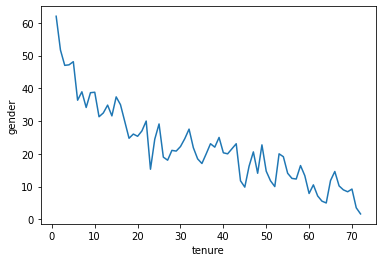

In [34]:
sns.lineplot(data=churn_rate['gender'])

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

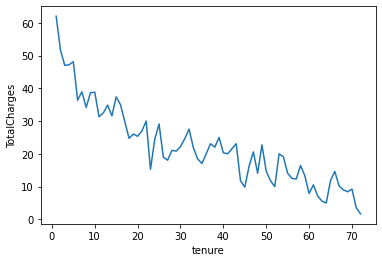

In [35]:
sns.lineplot(data=churn_rate['TotalCharges'])

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

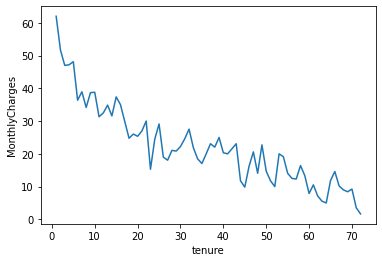

In [36]:
sns.lineplot(data=churn_rate['MonthlyCharges'])

<AxesSubplot:xlabel='tenure', ylabel='Dependents'>

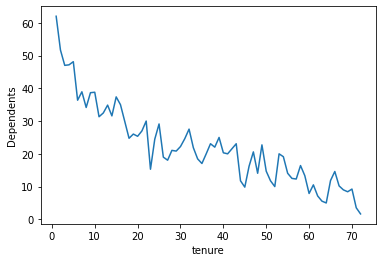

In [37]:
sns.lineplot(data=churn_rate['Dependents'])

<AxesSubplot:xlabel='tenure', ylabel='PhoneService'>

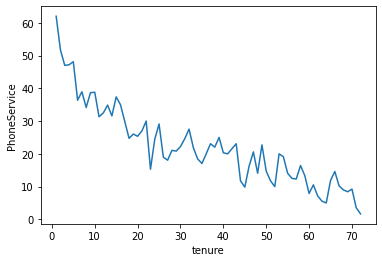

In [38]:
sns.lineplot(data=churn_rate['PhoneService'])

<AxesSubplot:xlabel='tenure', ylabel='InternetService'>

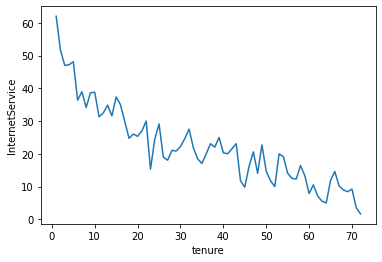

In [39]:
sns.lineplot(data=churn_rate['InternetService'])

<AxesSubplot:xlabel='tenure', ylabel='OnlineSecurity'>

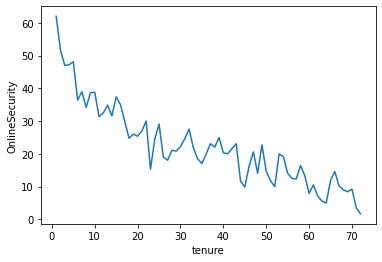

In [40]:
sns.lineplot(data=churn_rate['OnlineSecurity'])

### 9) Broader Cohort Groups
**Based on the tenure column values we create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '24-48 Months'
   * '12-24 Months'
   * 'Over 48 Months'    

In [41]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [42]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [43]:
df.head(10)[['tenure','Tenure Cohort']]

tenure   Tenure Cohort
0       1     0-12 Months
1      34    24-48 Months
2       2     0-12 Months
3      45    24-48 Months
4       2     0-12 Months
5       8     0-12 Months
6      22    12-24 Months
7      10     0-12 Months
8      28    24-48 Months
9      62  Over 48 Months

### 10)   We Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

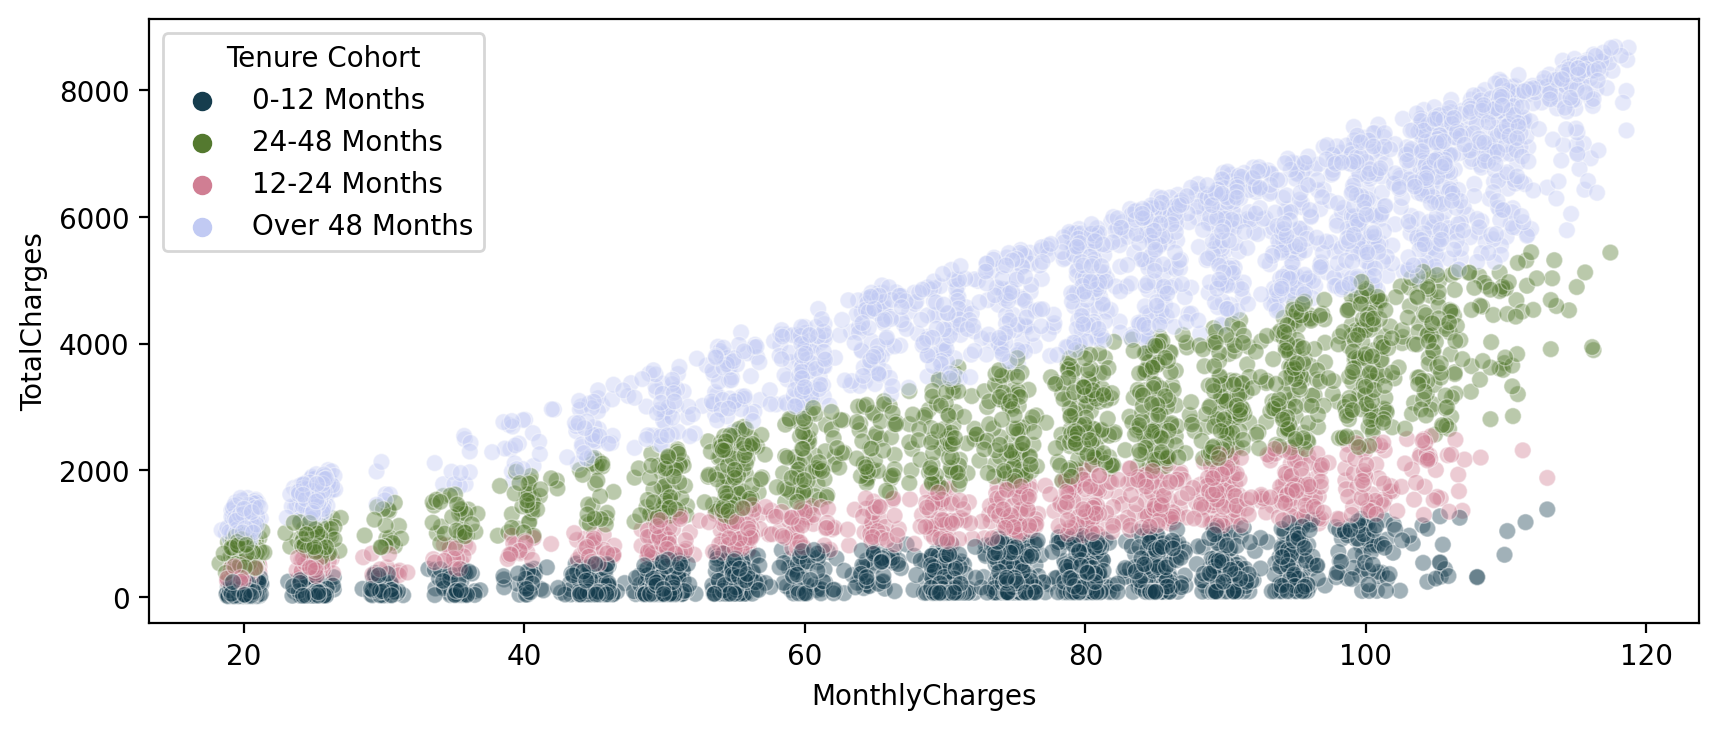

In [44]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort',alpha=0.4,palette='cubehelix')

### 11) Create a count plot showing the churn count per cohort

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

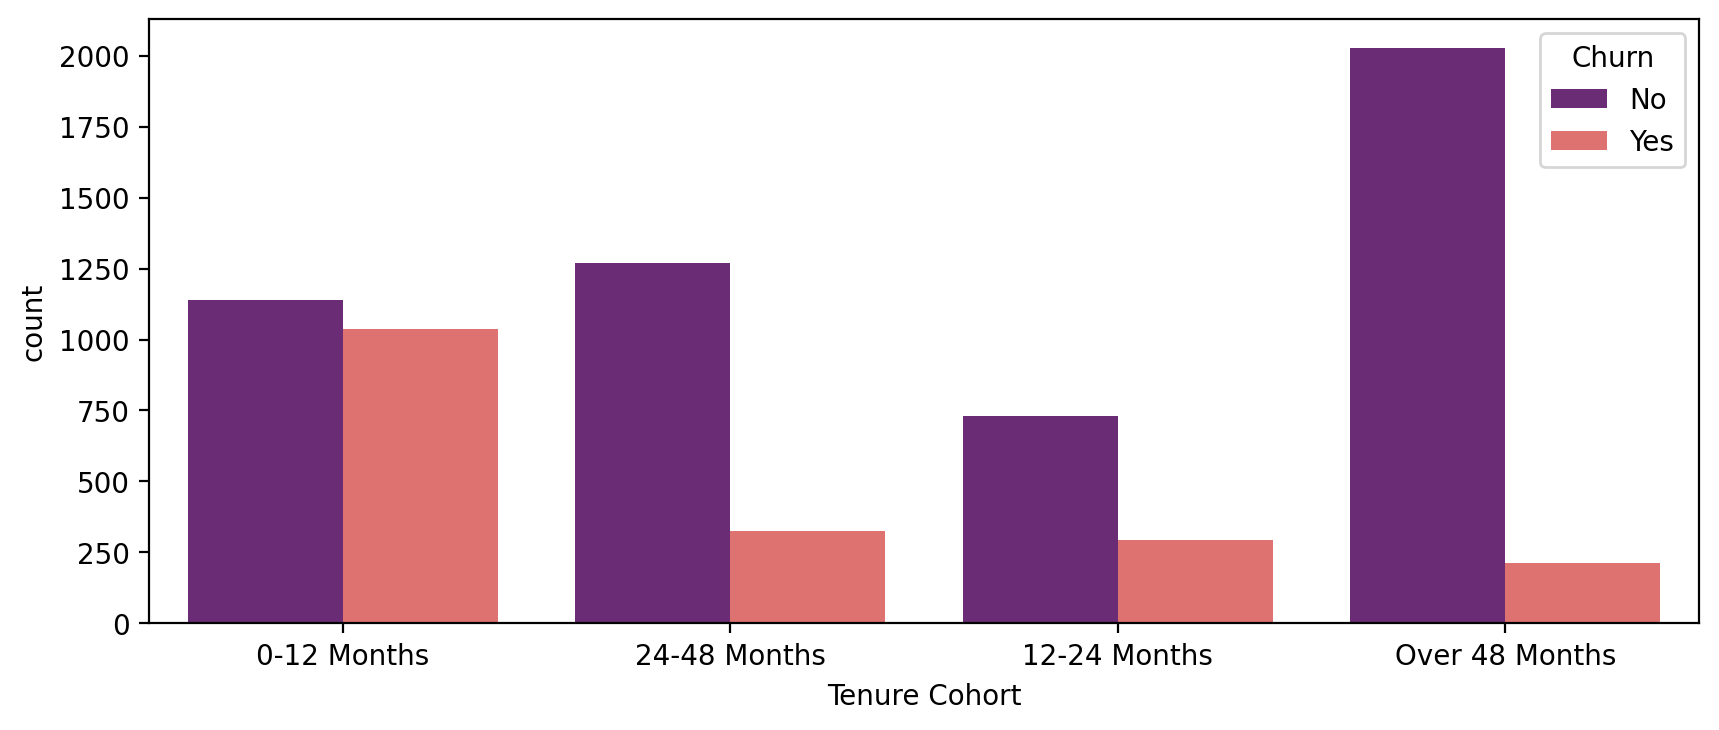

In [45]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn',palette='magma')

<Figure size 2000x800 with 0 Axes>

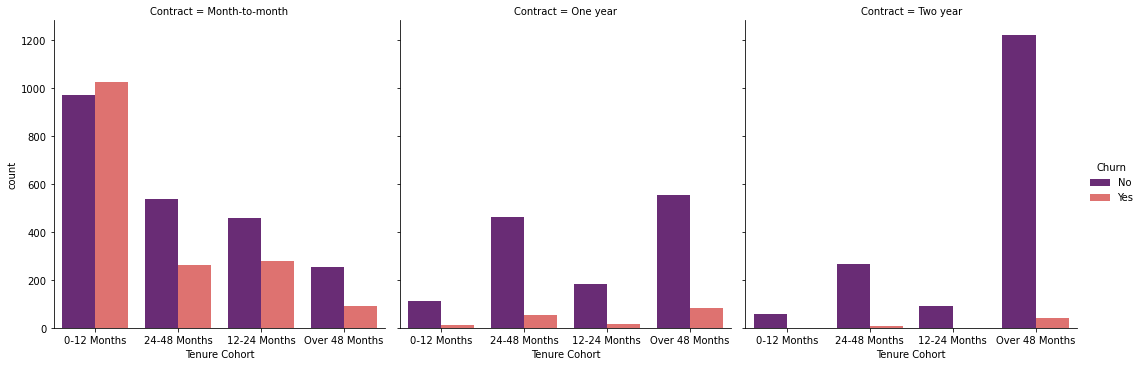

In [46]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count',palette='magma')

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.**


## Single Decision Tree

**We Separate out the data into X features and Y label and create dummy variables where necessary and note which features are not useful and should be dropped.**

In [47]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7027  6840-RESVB    Male              0     Yes        Yes      24   
7028  2234-XADUH  Female              0     Yes        Yes      72   
7029  4801-JZAZL  Female              0     Yes        Yes      11   
7030  8361-LTMKD    Male              1     Yes         No       4   
7031  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7027          Yes               Yes             DSL            Yes  ...   
7028          Yes               Yes     Fiber optic             No  ...   
7029           No  No phone service             DSL            Yes  ...   
7030          Yes               Yes     Fiber optic             No  ...   
7031          Yes                No     Fiber optic            Yes  ...   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No          No              No  Month-to-month              Yes   
1             No          No              No        One year               No   
2             No          No              No  Month-to-month              Yes   
3            Yes          No              No        One year               No   
4             No          No              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7027         Yes         Yes             Yes        One year              Yes   
7028          No         Yes             Yes        One year              Yes   
7029          No          No              No  Month-to-month              Yes   
7030          No          No              No  Month-to-month              Yes   
7031         Yes         Yes             Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges TotalCharges  Churn  \
0              Electronic check          29.85        29.85     No   
1                  Mailed check          56.95      1889.50     No   
2                  Mailed check          53.85       108.15    Yes   
3     Bank transfer (automatic)          42.30      1840.75     No   
4              Electronic check          70.70       151.65    Yes   
...                         ...            ...          ...    ...   
7027               Mailed check          84.80      1990.50     No   
7028    Credit card (automatic)         103.20      7362.90     No   
7029           Electronic check          29.60       346.45     No   
7030               Mailed check          74.40       306.60    Yes   
7031  Bank transfer (automatic)         105.65      6844.50     No   

       Tenure Cohort  
0        0-12 Months  
1       24-48 Months  
2        0-12 Months  
3       24-48 Months  
4        0-12 Months  
...              ...  
7027    12-24 Months  
7028  Over 48 Months  
7029     0-12 Months  
7030     0-12 Months  
7031  Over 48 Months  

[7032 rows x 22 columns]

In [48]:
X = df.drop(['Churn','customerID'],axis = 1)
X = pd.get_dummies(X,drop_first=True)
y = df['Churn']

**We Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101**

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt = DecisionTreeClassifier(max_depth=6)

In [53]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [54]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [55]:
preds = dt.predict(X_test)

In [56]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



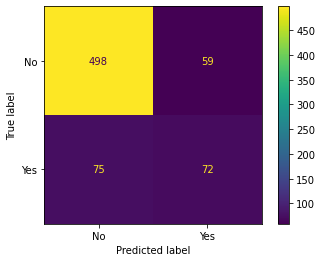

In [57]:
plot_confusion_matrix(dt,X_test,y_test)

**The confusion Matrix clearly tells us that there are 75 people who won't churn but they did and 59 people who churned but they didn't. We need to retify that**

**It is important to find the 75 people who are going to churn and we can stop the churn of these people by giving them extra benefits like discount coupon,promotions etc**

In [58]:
imp_feats = pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")

In [59]:
imp_feats.sort_values('Feature Importance')

Feature Importance
DeviceProtection_No internet service             0.000000
Dependents_Yes                                   0.000000
InternetService_No                               0.000000
Partner_Yes                                      0.000000
Tenure Cohort_Over 48 Months                     0.000000
OnlineBackup_No internet service                 0.000000
Tenure Cohort_24-48 Months                       0.000000
DeviceProtection_Yes                             0.000000
TechSupport_No internet service                  0.000000
PhoneService_Yes                                 0.000000
StreamingTV_Yes                                  0.000000
StreamingMovies_No internet service              0.000000
StreamingMovies_Yes                              0.000000
PaperlessBilling_Yes                             0.000000
PaymentMethod_Credit card (automatic)            0.000000
PaymentMethod_Mailed check                       0.000000
StreamingTV_No internet service                  0.000000
Tenure Cohort_12-24 Months                       0.000000
gender_Male                                      0.001237
OnlineBackup_Yes                                 0.005341
MultipleLines_No phone service                   0.007852
TechSupport_Yes                                  0.007868
OnlineSecurity_Yes                               0.008376
Contract_One year                                0.010021
MultipleLines_Yes                                0.012432
SeniorCitizen                                    0.012680
OnlineSecurity_No internet service               0.026290
Contract_Two year                                0.027065
PaymentMethod_Electronic check                   0.034436
MonthlyCharges                                   0.042293
TotalCharges                                     0.066135
InternetService_Fiber optic                      0.314060
tenure                                           0.423914

**Gives us an idea of the imortant and not so imortant features in the dataset**

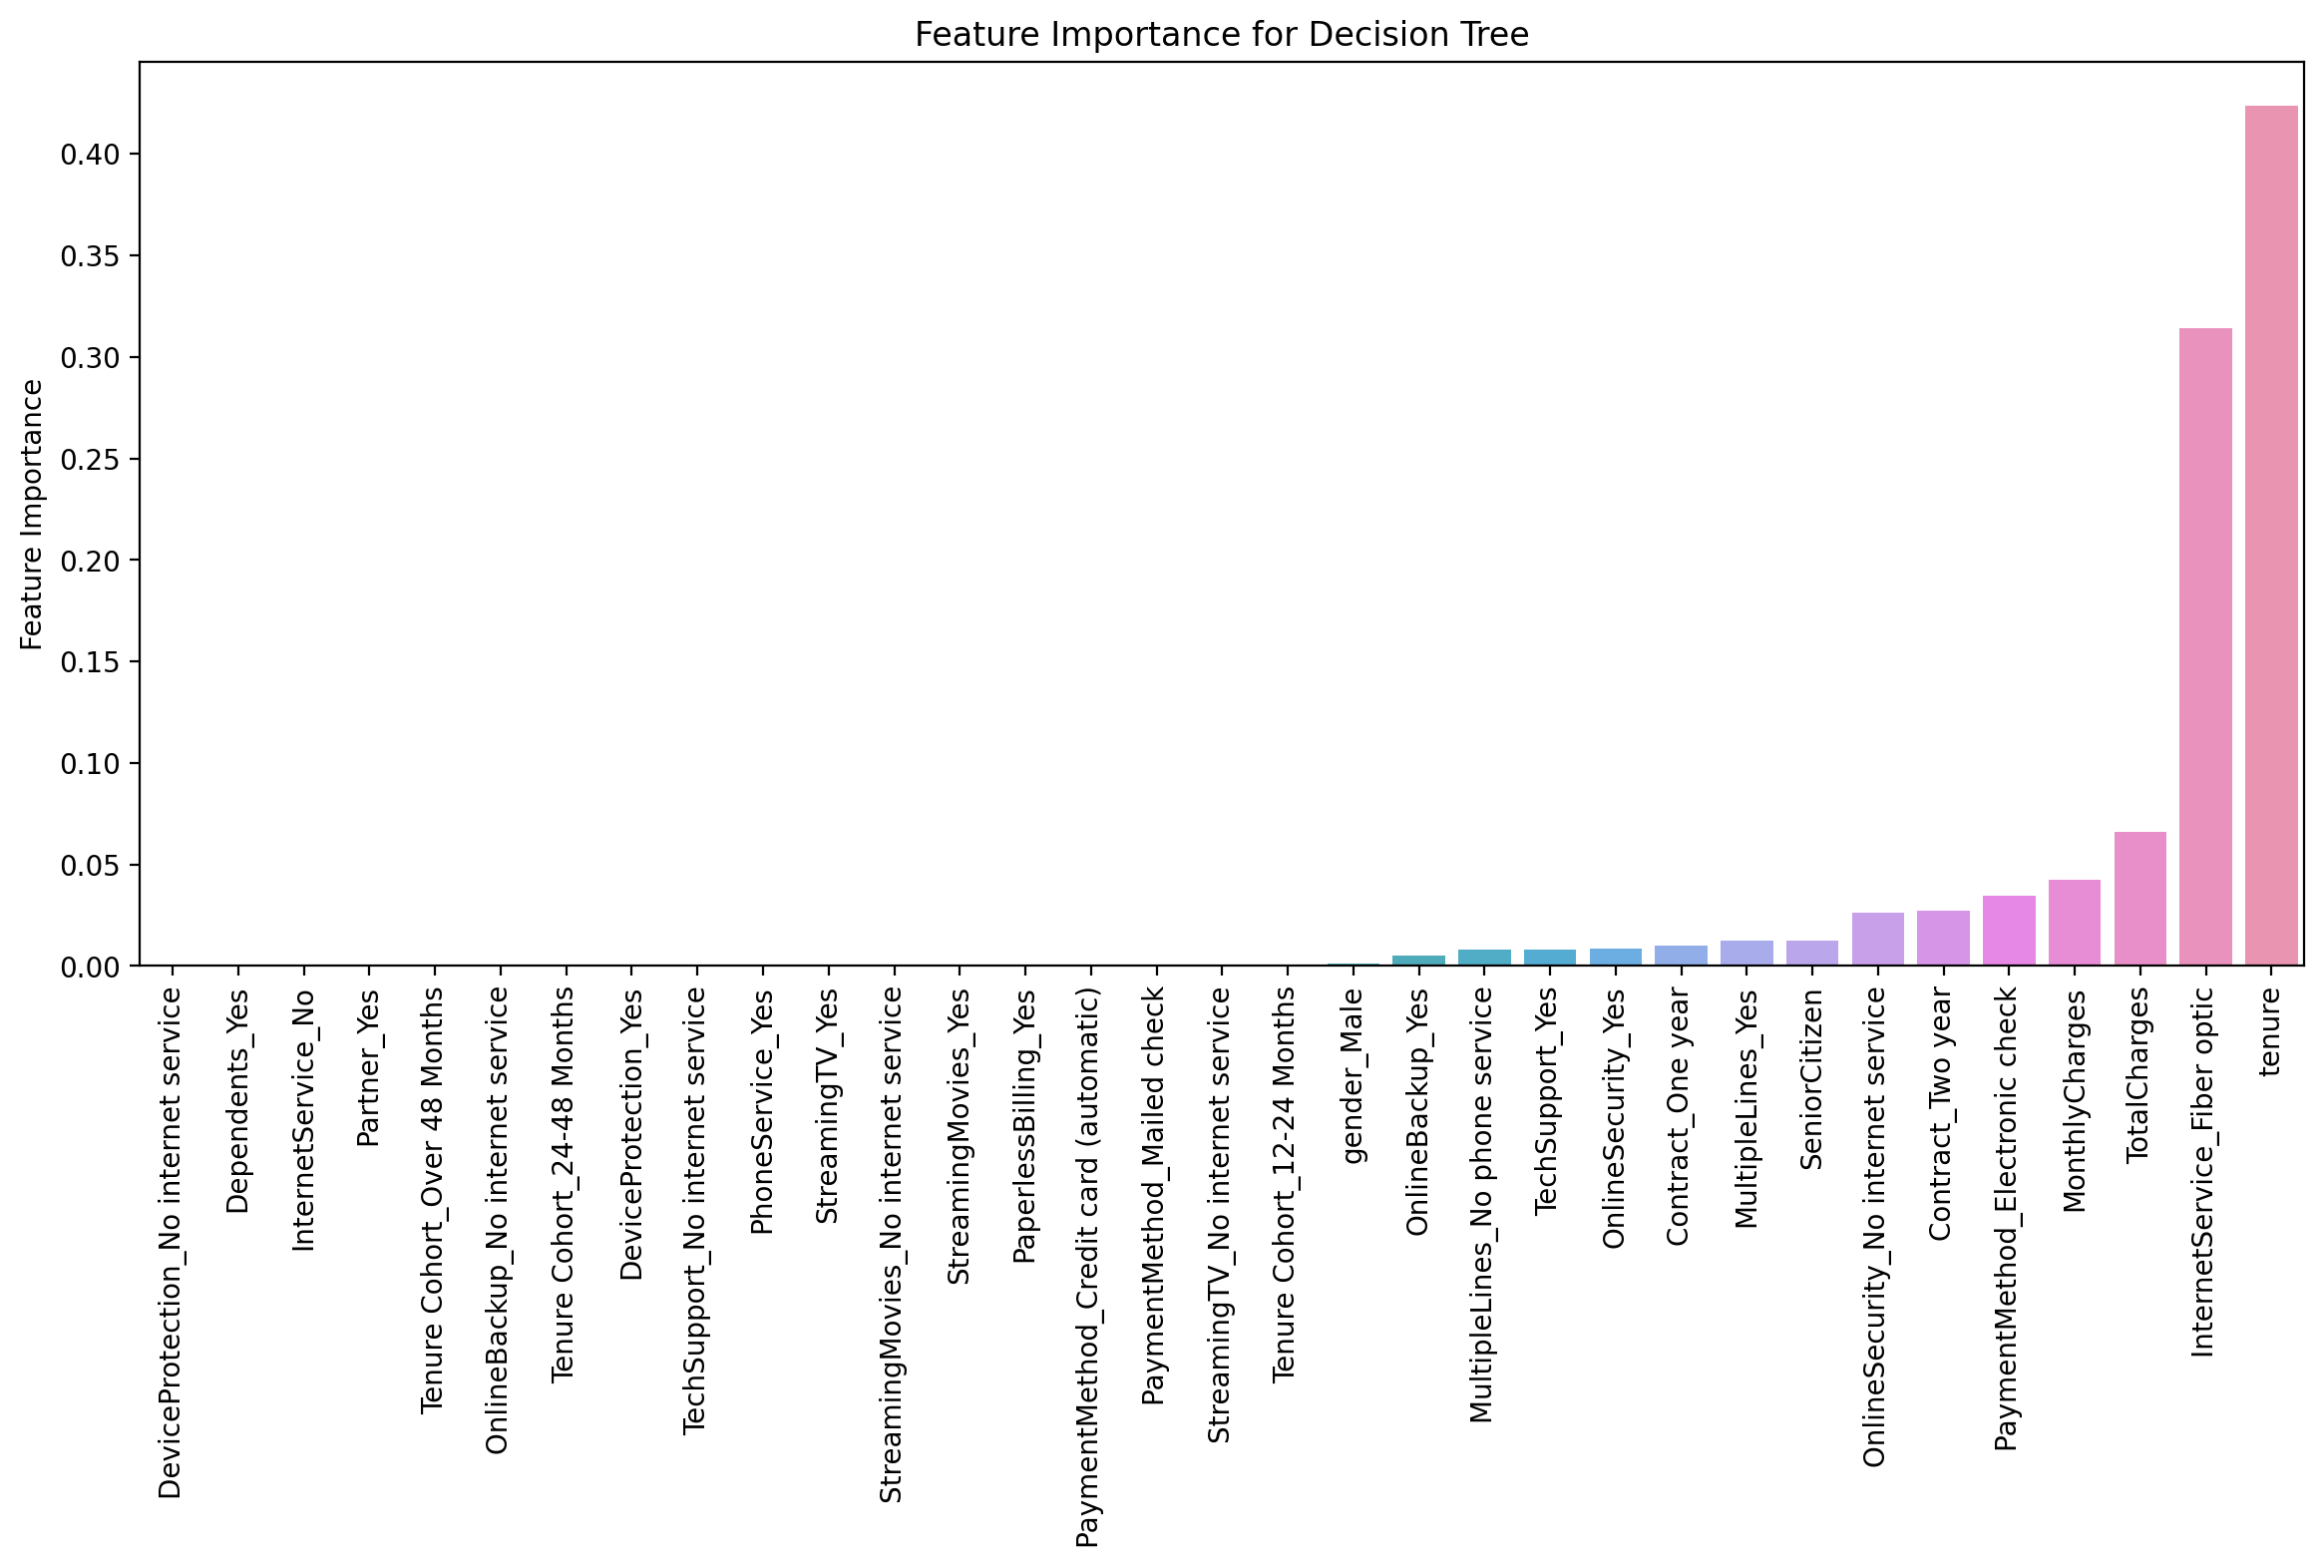

In [60]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

**This tells us that us the decesion tree used tenure as the biggest important feature in predicting the no. of people who will be churning with internet_service as well which we did not see in our analysis**

In [61]:
from sklearn.tree import plot_tree

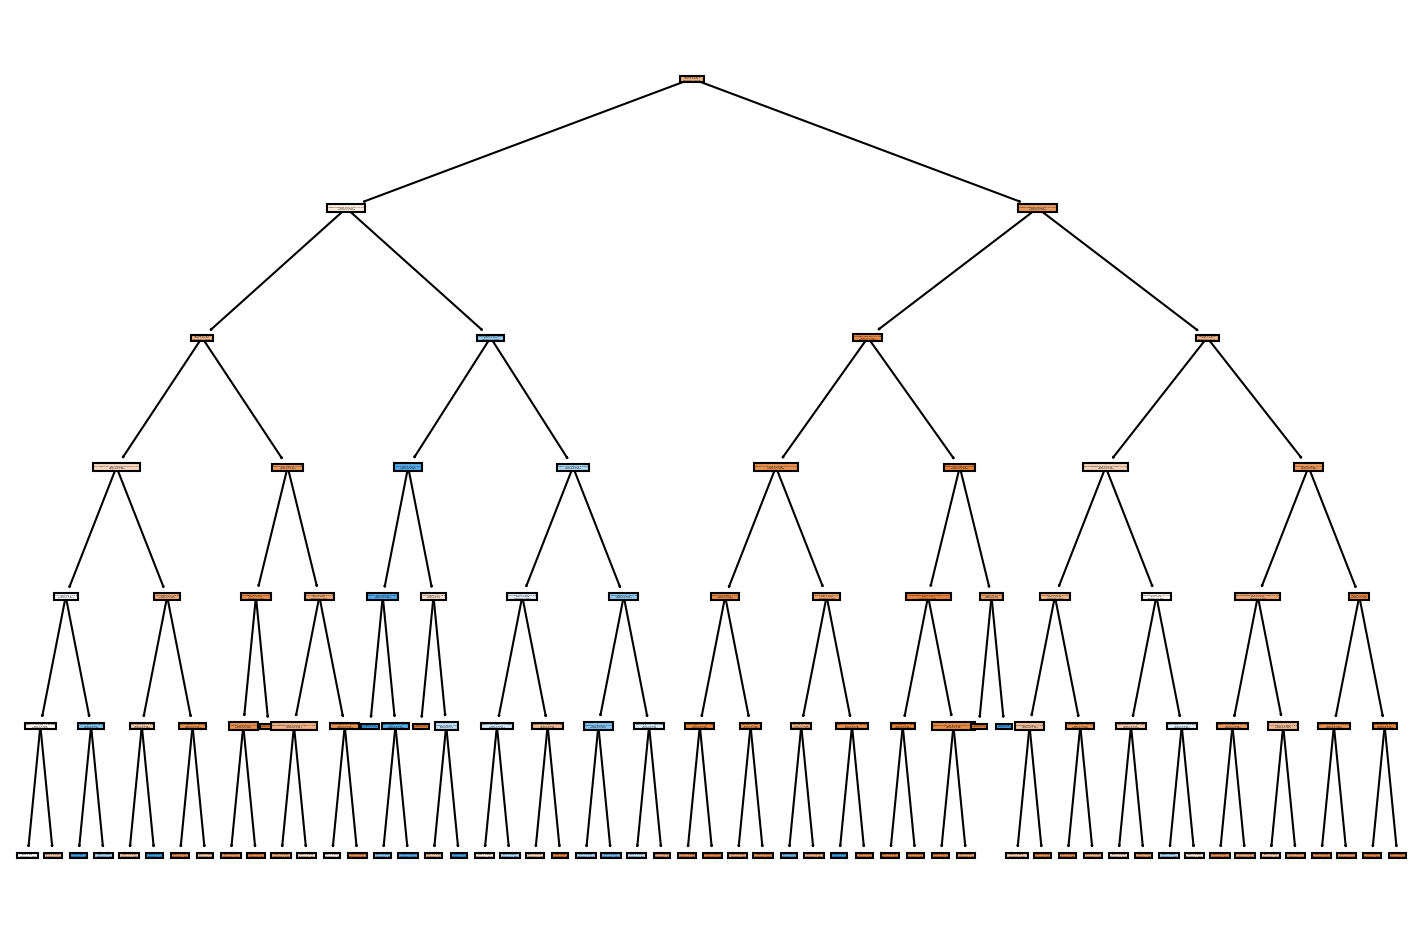

In [62]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt,filled=True,feature_names=X.columns);

**Due to the limitations of jupyter notebooks we won't be able to actually zoom in and understand/read the nodes and it not useful to have a super large tree to make critical buisness decesion**

## Random Forest

**We Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier(max_depth = 10)

In [65]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [66]:
preds = rf.predict(X_test)

In [67]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.60      0.50      0.54       147

    accuracy                           0.83       704
   macro avg       0.74      0.70      0.72       704
weighted avg       0.82      0.83      0.82       704



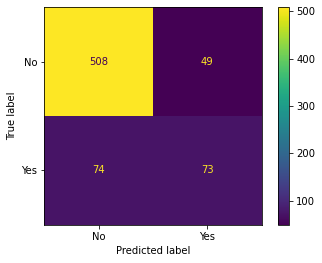

In [68]:
plot_confusion_matrix(rf,X_test,y_test)

**While we are able to improve in Random forest due to max_depth we actually reduced our yes_churn**

## Boosted Trees

**We use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [69]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [70]:
ada_model = AdaBoostClassifier(n_estimators=100)

In [71]:
gb_model = GradientBoostingClassifier()

In [72]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [73]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [74]:
ada_preds = ada_model.predict(X_test)

In [75]:
gb_preds = gb_model.predict(X_test)

In [76]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



**We are getting a slightly better accuracy and recall in our Boostclassifier**

In [77]:
print(classification_report(y_test,gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



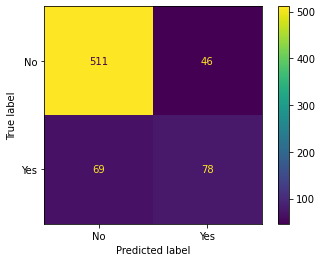

In [78]:
plot_confusion_matrix(ada_model,X_test,y_test)

**We now are getting better results in the section C (69) as that is the most important for us**

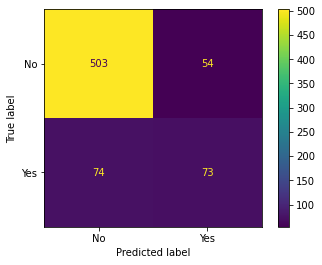

In [79]:
plot_confusion_matrix(gb_model,X_test,y_test)